<a href="https://colab.research.google.com/github/11-Kani/Hotel_Booking_Analysis__Project_1-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
#Mount the Drive such that we can get access to data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the data from a CSV(Comma Separated File)
Hotel_booking_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE POJECT_KANIKA/Hotel Bookings.csv')

In [4]:
#First glimpse of data file Hotel Bookings.csv
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
#Lets extract first 10 rows of data file
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
#Extracting last 10 rows of data file
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
#Now lets get the details each column like null/non null values,datatypes
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Creating a copy of original data with the required columns and it helps in maintaining the original dataframe.
Hotel_df = Hotel_booking_df.copy()

# Renaming the 'adr' column name to 'Average_daily_rate' for understanding the data well.

In [8]:
Hotel_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)  

In [ ]:
#Lets see the alteration in col name
Hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [9]:
#Computing the summary of statistics pertaining to the data frame columns having numeric values
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# We observed there are null values in columns(agent, children,company,country). We are replacing null values with zero for columns(agent,company) and replacing null values with 'OTHER' for country column. The null values in children we are replacing with its  mean value.

In [10]:
#Replacing null values
Hotel_df['children'].fillna(Hotel_df.children.mean(), inplace = True)
Hotel_df['children'] = Hotel_df['children'].astype(int)    #converting the data type of children column to int
Hotel_df['company'].fillna(0 , inplace = True)
Hotel_df['company'].astype(int)                            #converting the data type of company column to int
Hotel_df['agent'].fillna(0 , inplace = True)
Hotel_df['agent'].astype(int)                               #converting the data type of agent column to int
Hotel_df['country'].fillna('Other',inplace = True)

# Removing duplicate rows

In [11]:
Hotel_df[Hotel_df.duplicated()].shape 

(31994, 32)

In [12]:
#To make changes permanent in data file
Hotel_df.drop_duplicates(inplace = True)

We eliminated the null values and duplicated  rows too.

In [13]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

We observed that colums like Adults,Babies,Children corrospondingly has value as 0.So lets eliminate them

In [14]:
#We get the number of rows 
Hotel_df [Hotel_df.adults + Hotel_df.children + Hotel_df.babies == 0].shape

(166, 32)

In [15]:
#Removing the rows where total was 0
Hotel_df.drop(Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].index, inplace = True) 

# Adding new columns to data sheet

In [16]:
Hotel_df['Total_members'] = Hotel_df.adults + Hotel_df.children + Hotel_df.babies 
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20  #Removing outliers     
Hotel_df['Full_stay'] = Hotel_df.stays_in_weekend_nights + Hotel_df.stays_in_week_nights


# Creating subset dataframes for 'City' and 'Resort' hotel data

In [17]:
City_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='Resort Hotel'])

In [18]:
City_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Full_stay
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-03,1,2
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0.0,0,Transient,76.5,0,1,Canceled,2015-07-01,2,4


In [19]:
Resort_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Full_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0


# Hotel type Percentage

In [20]:
Hotel_typ =Hotel_df['hotel'].value_counts()
Hotel_typ

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel type')

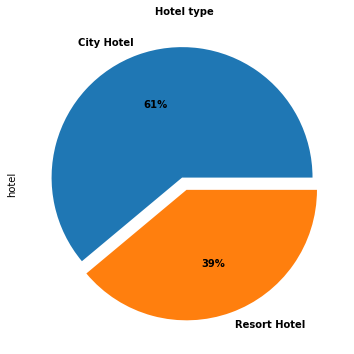

In [21]:
Hotel_type_ratio = Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(6,6),explode =[0.05,0.05]) 
plt.title('Hotel type',fontweight="bold", size=10)

We observed City Hotel shares 61% out of 100 than Resort Hotel.

# Customer type and percentage of car parking utilised

Text(0.5, 1.0, 'required_parking_spaces')

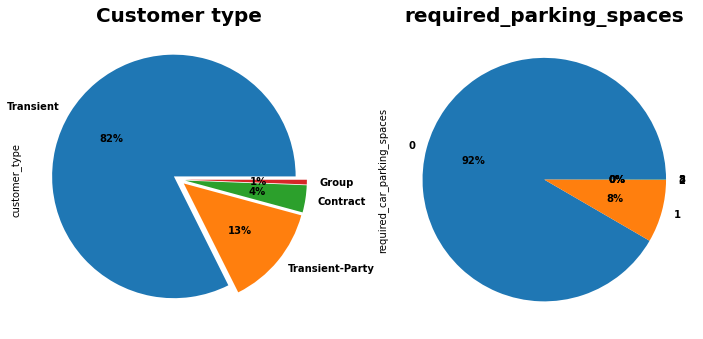

In [39]:
Hotel_df.customer_type.nunique()
Customer_typ =Hotel_df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode =[0.05]*4) 
plt.title('Customer type',fontweight="bold", size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(1,2,2)
Car_parking_spaces = Hotel_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

We observed:-
1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces


# Hotel Wise Bookings based on Month and Year

In [22]:
City_df.arrival_date_month.value_counts()

August       6576
July         5730
May          5402
April        5072
June         4997
March        4833
September    4232
October      4197
February     3591
December     2998
November     2922
January      2724
Name: arrival_date_month, dtype: int64

In [23]:
Resort_df.arrival_date_month.value_counts()

August       4666
July         4313
May          2942
April        2828
June         2759
October      2724
March        2656
February     2492
September    2450
December     2114
November     2051
January      1961
Name: arrival_date_month, dtype: int64

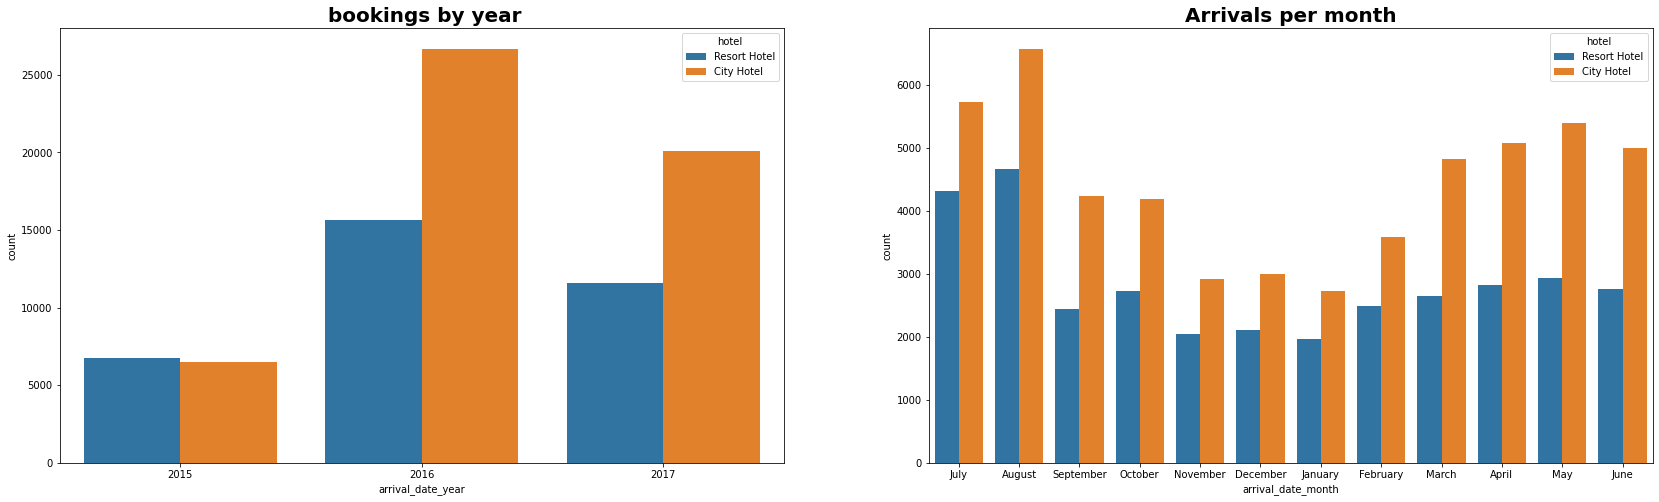

In [24]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1 )
sns.countplot(x= 'arrival_date_year', data= Hotel_df, hue= 'hotel').set_title (' bookings by year',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.countplot(data = Hotel_df, x = 'arrival_date_month',hue ='hotel')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.6)

1-->Bookings for City hotels are higher than Resort hotels over the years and in year 2016 the bookings for both the hotels were maximum. 
2-->Most bookings were done in the month of May,June, July, August.

# Bookings on weekdays and weekends

Text(0.5, 1.0, 'Number of stays on weekday nights')

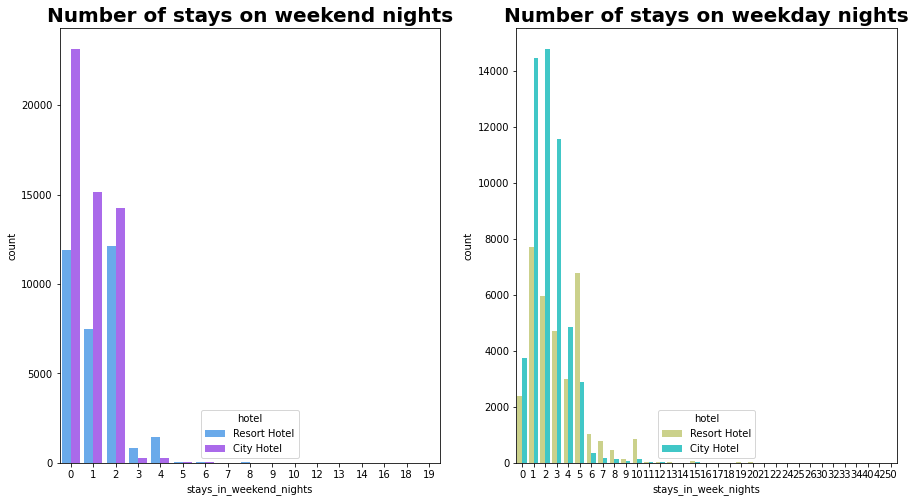

In [44]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=Hotel_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=Hotel_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

City hotels have more number of stays irrespective of week or weekend stays.

# Favourite meal by hotel type

Text(0.5, 1.0, 'Favourite food type')

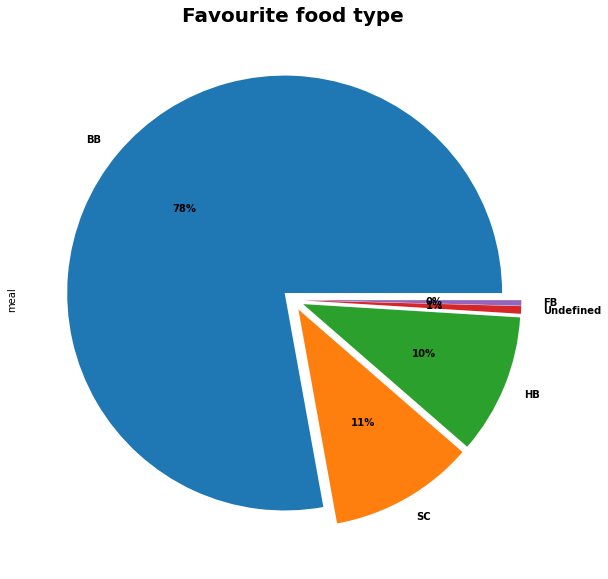

In [25]:
meal_typ =Hotel_df['meal'].value_counts()
Food_type_ratio = meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(10,10),explode = [0.05,0.05,0.05,0.05,0.05])
plt.title('Favourite food type',fontweight="bold", size=20) 

BB stands for Bed and Breakfast. 
HB stands for Half Board (in which breakfast and dinner are included.) 
FB stands for Full Board (in which breakfast, lunch and dinner are included.)

We observed 78% of people prefer 'BB' type meal.

# From which country guests are visiting the hotel?

Text(0.5, 1.0, 'Number of bookings country wise')

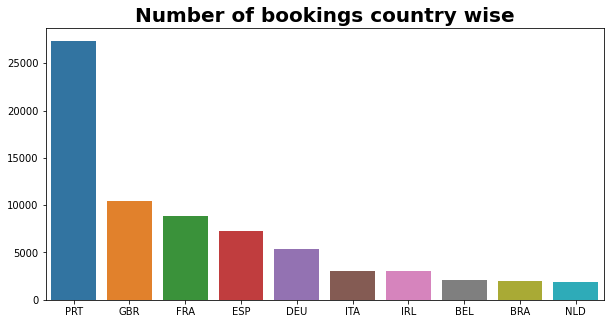

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot (y= list(Hotel_df.country.value_counts().head (10)), x= list(Hotel_df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)
#list(Hotel_df.country.value_counts().head (10))-->[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]
#list(Hotel_df.country.value_counts().head(10).index)-->['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

We observed most  guests visited the hotels where from  Portugal and other Europian contries.

# Which agent made the maximum bookings?

Text(0.5, 1.0, 'No. of bookings done by agents')

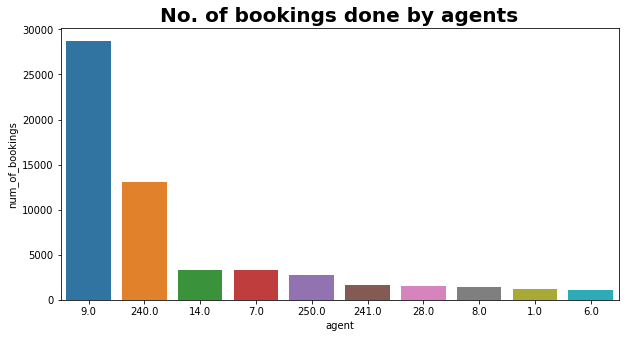

In [ ]:
agent_df = pd.DataFrame(Hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
agent_df = agent_df[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'No. of bookings done by agents',fontweight="bold", size=20)

We observed Agent no. 9 has made most no. of bookings.

# Most preferred Room type

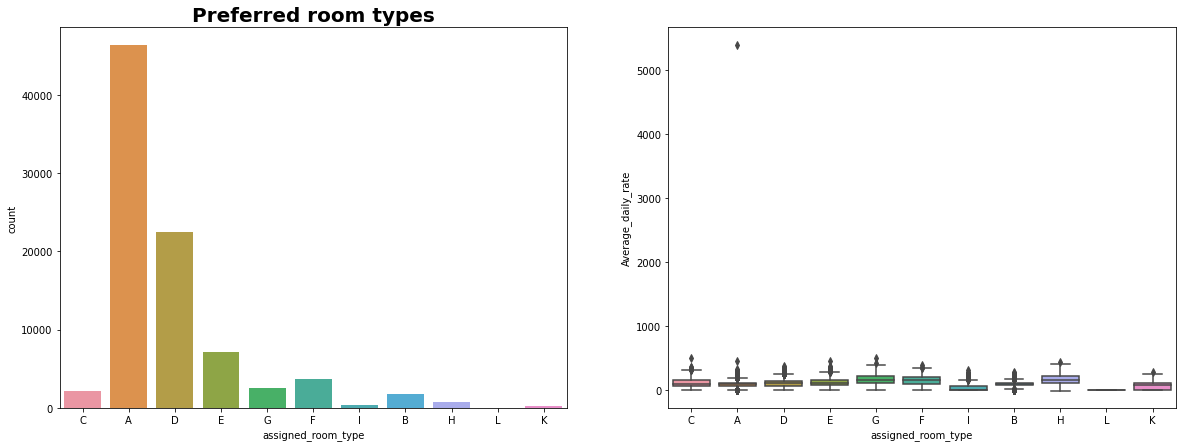

In [38]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = Hotel_df['assigned_room_type'])
plt.title('Preferred room types',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.boxplot(x = Hotel_df['assigned_room_type'], y = Hotel_df['Average_daily_rate'])

We observed 'A' is the most preferred room type.

# Distribution Channel Type

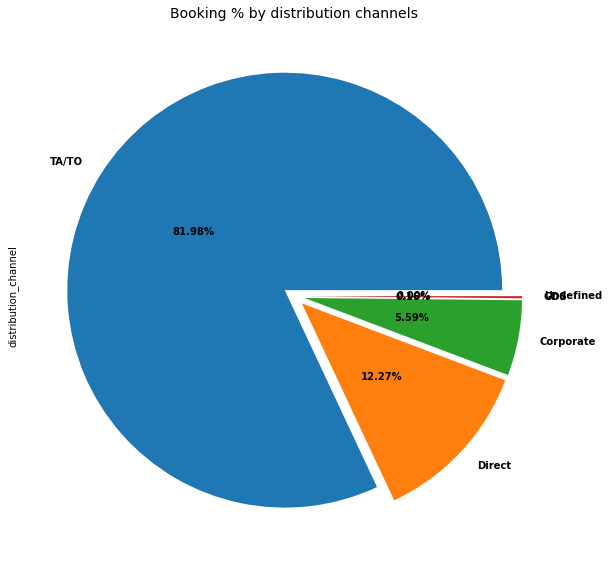

In [ ]:
booking_distibution_typ =Hotel_df['distribution_channel'].value_counts()
# plt.pie(x=Hotel_df, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
booking_distributuion_type_ratio =booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'},figsize =(10,10), pctdistance=0.5,explode = [0.05]*5)
plt.title("Booking % by distribution channels", fontsize=14);

We observed 81.98% of share is occupied by TA/TO

# Bookings preferred with deposit type

Text(0.5, 1.0, 'Booking preferred with deposit type')

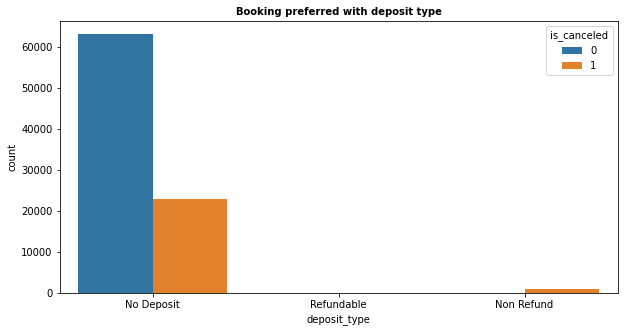

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_df,hue ='is_canceled')
plt.title('Booking preferred with deposit type',fontweight ="bold",size =10)

We observed Most Bookings are done with 'No deposit' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

Analysing rate of cancellation 

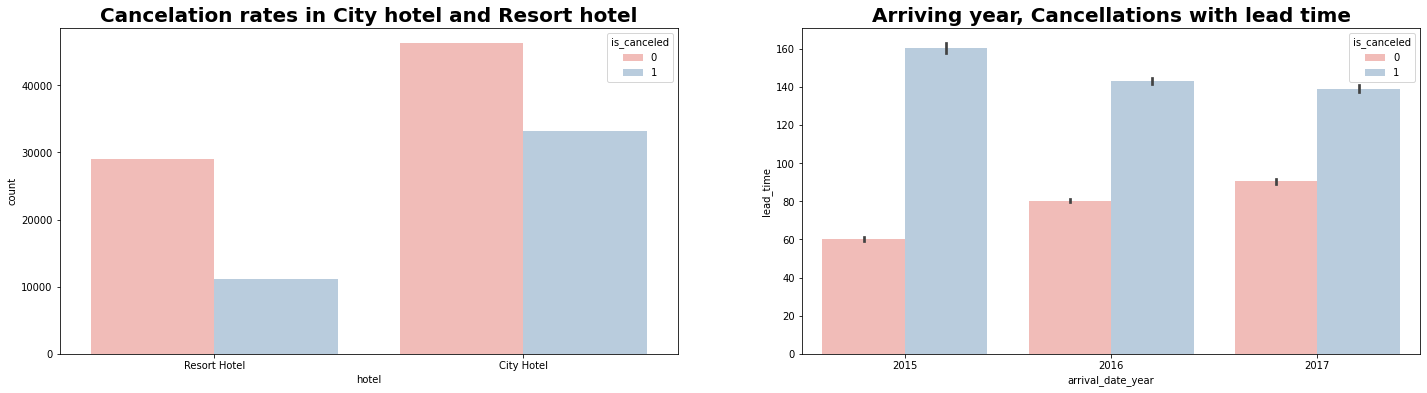

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

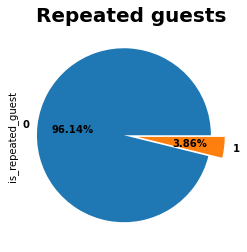

In [37]:

Repeated = Hotel_df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct= '%.2f%%',textprops={'weight': 'bold'},explode = [0.08]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);

# Average_daily_rate month wise

Text(0.5, 1.0, 'Average daily rate month wise')

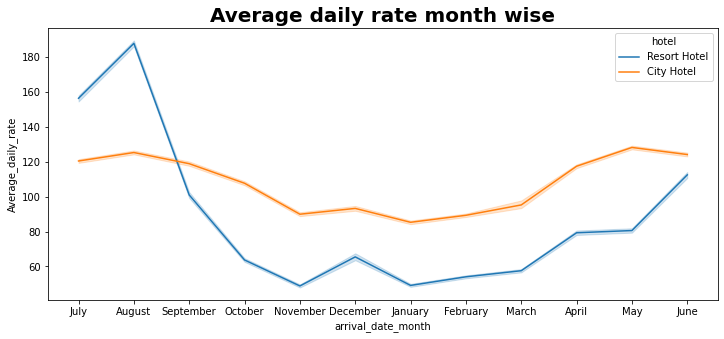

In [43]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_df, x = 'arrival_date_month', y = 'Average_daily_rate', hue = 'hotel',sort =True)
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

# Average_daily_price per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


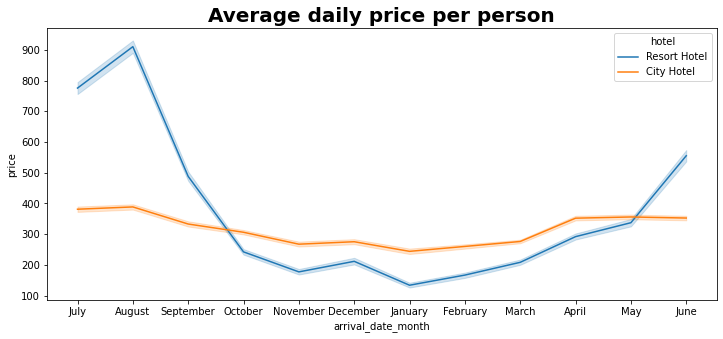

In [42]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
Hotel_df['Average_Daily_rate_pp'] = Hotel_df['Average_daily_rate'] / (Hotel_df['adults'] + Hotel_df['children']) 
Actual_guests = Hotel_df.loc[Hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

# Average_daily_rate on staying hotel

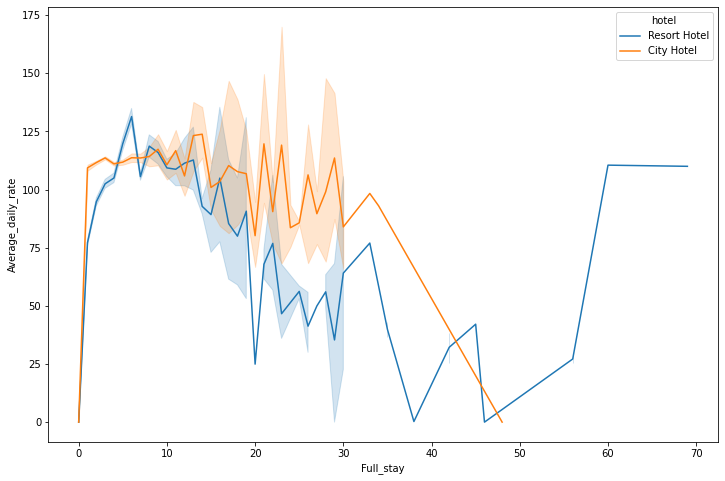

In [45]:
plt.figure(figsize =(12,8))
sns.lineplot(data = Hotel_df, x = 'Full_stay', y = 'Average_daily_rate', hue = 'hotel')

We observed after 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days. For city hotels is almost constant.

# Special requests offered by hotel

In [40]:
Hotel_df['total_of_special_requests'].value_counts()

0    43789
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests')

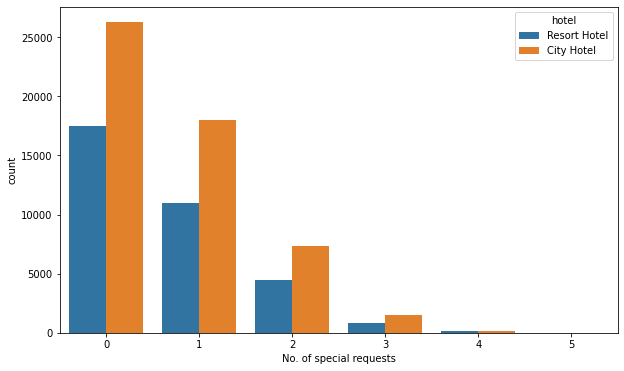

In [41]:
plt.figure(figsize =(10,6))
sns.countplot(data =Hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')